In [1]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.4"

$year
[1] "2021"

$month
[1] "02"

$day
[1] "15"

$`svn rev`
[1] "80002"

$language
[1] "R"

$version.string
[1] "R version 4.0.4 (2021-02-15)"

$nickname
[1] "Lost Library Book"

In [1]:
### Instalação de bibliotecas

# Para cálculo do VIF
install.packages("rms")

# Para cálculo do KS e AUC
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rms’ is not available for this version of R
‘rms’ version 6.8-1 is in the repositories but depends on R (>= 4.1.0)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [2]:
### Carregamento de bibliotecas
  
library(rms)
library(ROCR)

ERROR: Error in library(rms): there is no package called ‘rms’


In [4]:
### Leitura da base de dados

dados_investimento <- read.table(file = "Investimento_Acoes.txt",
                               sep = "\t",
                               dec = ".",
                               header = TRUE)
View(dados_investimento)


ID_Cliente,Investimento_Fixa,Investimento_Tesouro,Investimento_Poupanca,Rendimento_Liq_12M,Saldo_Conta,Investiu_Variavel_6M
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.00,5434.42,0.00,229.52,0.00,0
2,8240.53,4066.68,0.00,429.71,6145.54,0
3,3843.34,4757.95,0.00,65.21,0.00,0
4,2297.05,4201.29,0.00,308.23,0.00,0
5,2477.00,4146.93,0.00,156.40,1328.92,0
6,0.00,1224.36,0.00,44.74,1252.03,0
7,7581.91,6226.31,0.00,36.74,0.00,0
8,13175.12,8205.17,1218.63,13.82,0.00,0
9,8915.83,14130.66,0.00,912.88,0.00,0


In [5]:
# Medidas resumo
summary(dados_investimento)

   ID_Cliente   Investimento_Fixa Investimento_Tesouro Investimento_Poupanca
 Min.   :   1   Min.   :    0     Min.   :    0        Min.   :    0.0      
 1st Qu.:1955   1st Qu.: 1420     1st Qu.: 1026        1st Qu.:    0.0      
 Median :3909   Median : 3036     Median : 2228        Median :    0.0      
 Mean   :3909   Mean   : 4131     Mean   : 3063        Mean   :  312.3      
 3rd Qu.:5863   3rd Qu.: 5813     3rd Qu.: 4427        3rd Qu.:    0.0      
 Max.   :7817   Max.   :39843     Max.   :26943        Max.   :15107.3      
 Rendimento_Liq_12M  Saldo_Conta      Investiu_Variavel_6M
 Min.   :   8.94    Min.   :    0.0   Min.   :0.00000     
 1st Qu.:  53.70    1st Qu.:    0.0   1st Qu.:0.00000     
 Median : 124.72    Median :    0.0   Median :0.00000     
 Mean   : 179.52    Mean   :  483.3   Mean   :0.07778     
 3rd Qu.: 247.37    3rd Qu.:  463.6   3rd Qu.:0.00000     
 Max.   :1473.21    Max.   :12572.7   Max.   :1.00000     

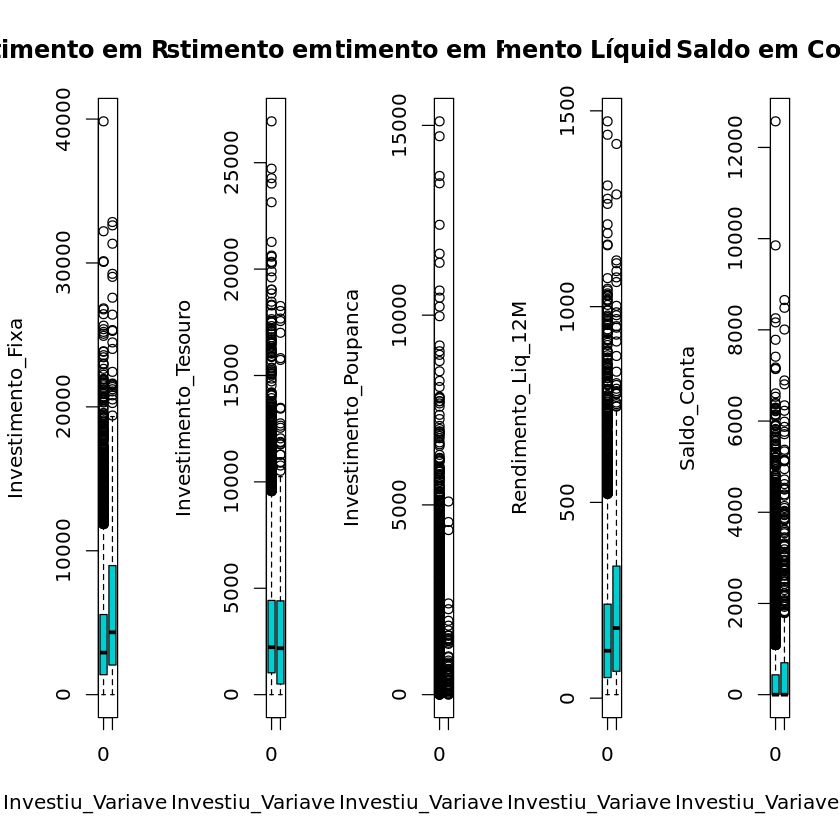

In [10]:
  # Gráficos de boxplots
  
  par(mfrow = c(1,5), cex = 1)
  boxplot(Investimento_Fixa ~ Investiu_Variavel_6M,     data = dados_investimento, col = "darkturquoise", main = "Investimento em Renda Fixa")
  boxplot(Investimento_Tesouro ~ Investiu_Variavel_6M,  data = dados_investimento, col = "darkturquoise", main = "Investimento em Tesouro")
  boxplot(Investimento_Poupanca ~ Investiu_Variavel_6M, data = dados_investimento, col = "darkturquoise", main = "Investimento em Poupança")
  boxplot(Rendimento_Liq_12M ~ Investiu_Variavel_6M,    data = dados_investimento, col = "darkturquoise", main = "Rendimento Líquido em 12M")
  boxplot(Saldo_Conta ~ Investiu_Variavel_6M,           data = dados_investimento, col = "darkturquoise", main = "Saldo em Conta")


In [11]:
  # Comando auxiliar para para omitir notação científica nos p-valores
  
  options(scipen = 999)

  # Ajuste do modelo 1: inicial
  
  regressao_1 <- glm(Investiu_Variavel_6M ~
                       Investimento_Fixa +
                       Investimento_Tesouro +
                       Investimento_Poupanca +
                       Rendimento_Liq_12M +
                       Saldo_Conta,
                     family = binomial(link = 'logit'),
                     data = dados_investimento)

summary(regressao_1)



Call:
glm(formula = Investiu_Variavel_6M ~ Investimento_Fixa + Investimento_Tesouro + 
    Investimento_Poupanca + Rendimento_Liq_12M + Saldo_Conta, 
    family = binomial(link = "logit"), data = dados_investimento)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5674  -0.4160  -0.3568  -0.3142   3.2794  

Coefficients:
                         Estimate  Std. Error z value             Pr(>|z|)    
(Intercept)           -3.03374236  0.08096865 -37.468 < 0.0000000000000002 ***
Investimento_Fixa      0.00008317  0.00001087   7.648   0.0000000000000204 ***
Investimento_Tesouro  -0.00001037  0.00001534  -0.676              0.49906    
Investimento_Poupanca -0.00052821  0.00010053  -5.254   0.0000001486182413 ***
Rendimento_Liq_12M     0.00078165  0.00028365   2.756              0.00586 ** 
Saldo_Conta            0.00019513  0.00003278   5.953   0.0000000026284680 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomia

In [13]:
  # Ajuste do modelo 2: retirando Investimento_Tesouro
  
  regressao_2 <- glm(Investiu_Variavel_6M ~
                       Investimento_Fixa +
                       Investimento_Poupanca +
                       Rendimento_Liq_12M +
                       Saldo_Conta,
                     family = binomial(link = 'logit'),
                     data = dados_investimento)
  
  summary(regressao_2)


Call:
glm(formula = Investiu_Variavel_6M ~ Investimento_Fixa + Investimento_Poupanca + 
    Rendimento_Liq_12M + Saldo_Conta, family = binomial(link = "logit"), 
    data = dados_investimento)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5737  -0.4157  -0.3568  -0.3151   3.2803  

Coefficients:
                         Estimate  Std. Error z value             Pr(>|z|)    
(Intercept)           -3.05918437  0.07194886 -42.519 < 0.0000000000000002 ***
Investimento_Fixa      0.00008578  0.00001011   8.484 < 0.0000000000000002 ***
Investimento_Poupanca -0.00052722  0.00010055  -5.243        0.00000015775 ***
Rendimento_Liq_12M     0.00068468  0.00024342   2.813              0.00491 ** 
Saldo_Conta            0.00019556  0.00003278   5.966        0.00000000244 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4273.0  on 7816  degrees of freedom
Residual deviance: 404

In [15]:
# Avaliação de colinearidade no modelo 2

data.frame(VIF = vif(regressao_2))

ERROR: Error in vif(regressao_2): could not find function "vif"
